# 07g scATAC plotting

used this docker image

docker run 
--rm 
-d 
--name signac 
-p 8880:8888 
-e JUPYTER_ENABLE_LAB=YES 
-v /Users/efast/Documents/:/home/jovyan/work 
signac:0.2.5

In [1]:
library(Signac)
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Mmusculus.v79)
library(ggplot2)
library(JASPAR2018)
library(TFBSTools)
#library(BSgenome.Mmusculus.UCSC.mm10)
library(tidyverse)

set.seed(1234)

Warning message:
“package ‘Seurat’ was built under R version 3.6.3”Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading req

#### read files

In [2]:
LT <- readRDS("./sc_objects/scATAC_HSC_processed_chromvar_macs2.rds")
combo <- readRDS("./sc_objects/scATAC_combo_processed_chromvar_macs2.rds")

MA0018.3	CREB1	0.328639974
MA0476.1	FOS		6.84E-67
MA0099.3	FOS::JUN	2.98E-63
MA0105.4	NFKB1	1
MA0778.1	NFKB2	1
MA0144.2	STAT3	1

MA0050.2	IRF1	0.000992006
MA0051.1	IRF2	0.002935402
MA1418.1	IRF3	0.068651746
MA1419.1	IRF4	3.33E-07
MA1420.1	IRF5	0.7358479
MA0772.1	IRF7	7.51E-08
MA0652.1	IRF8	9.84E-06
MA0653.1	IRF9	2.37E-05 - downstream of ifn receptor

MA0511.2	RUNX2
MA0036.3	GATA2
MA0081.1	SPIB
MA0080.4	SPI1


'MA0018.3',  
'MA0476.1',
'MA0099.3',
'MA0105.4',
'MA0778.1',
'MA0050.2',
'MA0051.1',
'MA1418.1',
'MA1419.1',
'MA1420.1',
'MA0772.1',
'MA0652.1',
'MA0653.1',
'MA0144.2'



MA1418.1
MA0772.1
MA0653.1

Warning message:
"Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session."

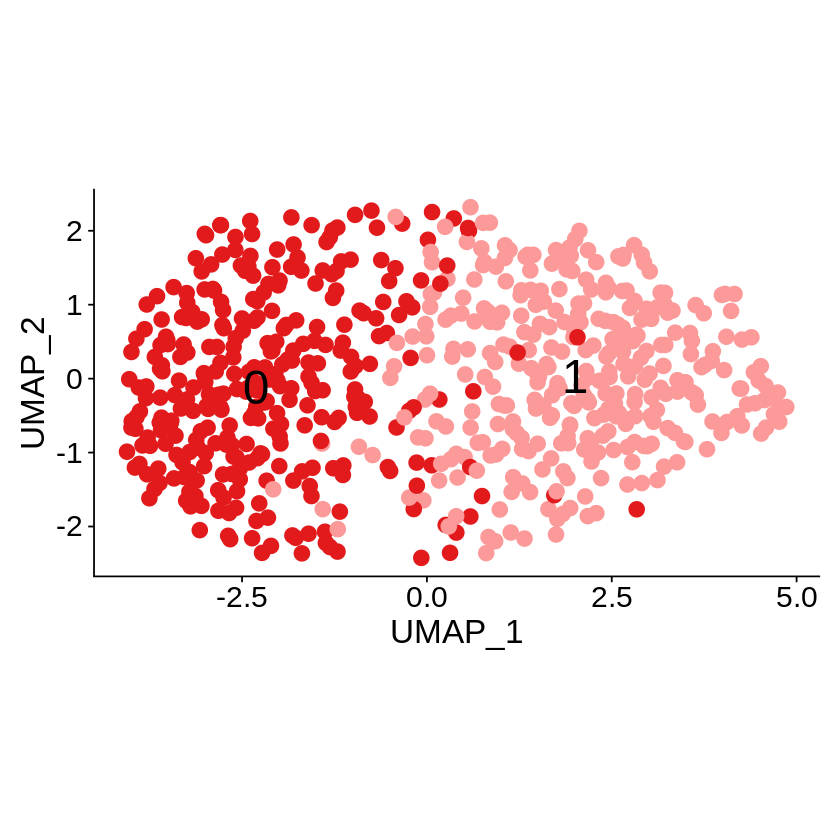

In [3]:
baseplot = DimPlot(object = LT,
                    label = TRUE,
                    cols = c('#e31a1c', '#fb9a99'),
                    #cols = 'Set1',
                    pt.size = 4,
                    label.size = 10,
                    #vector.friendly = TRUE
                    
                        )



baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) +
NoLegend()

In [4]:
#save plot
ggsave('scATAC_cluster_HSC.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


In [5]:
#save plot
ggsave('scATAC_cluster_HSC.pdf', plot = last_plot(), device = 'pdf', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


In [6]:
#save plot
ggsave('scATAC_cluster_HSC.jpg', plot = last_plot(), device = 'jpg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


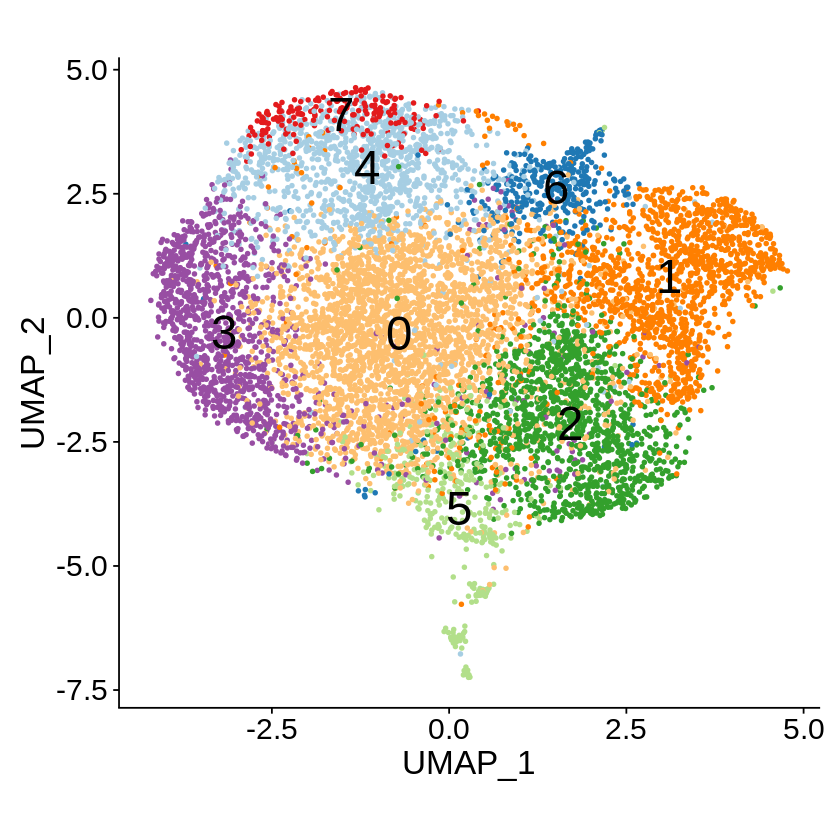

In [7]:
baseplot = DimPlot(object = combo,
                    label = TRUE,
                    cols = c('#fdbf6f', '#ff7f00','#33a02c', '#984ea3',  '#a6cee3', '#b2df8a', '#1f78b4', '#e31a1c'),
                    pt.size = 0.9,
                    label.size = 10,
                    #vector.friendly = TRUE
                    
                        )
##33a02c

#984ea3
#'#1f78b4', '#ff7f00','#b2df8a', '#fb9a99',  '#a6cee3', '#33a02c', '#fdbf6f', '#e31a1c'

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 0.7) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) +
NoLegend()

In [8]:
#save plot
ggsave('scATAC_cluster_combo.pdf', plot = last_plot(), device = 'pdf', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


In [9]:
#save plot
ggsave('scATAC_cluster_combo.jpg', plot = last_plot(), device = 'jpg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


In [10]:
#save plot
ggsave('scATAC_cluster_combo.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300) 


Saving 6.67 x 6.67 in image


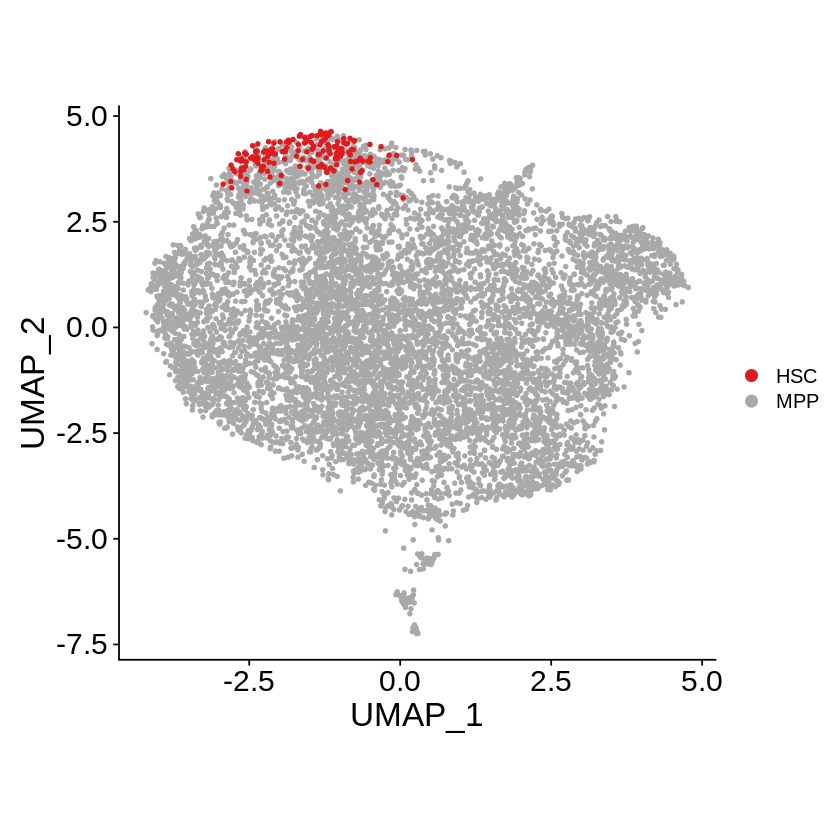

In [11]:
baseplot = DimPlot(object = combo,
                    group.by = 'dataset',
                    #label = FALSE,
                    cols = c('#e31a1c', '#A9A9A9'),
                    pt.size = 0.9,
                    label.size = 10,
                    #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 0.7) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [12]:
#save plot
ggsave('scATAC_HSC_MPP_combo.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


In [13]:
#save plot
ggsave('scATAC_HSC_MPP_combo.pdf', plot = last_plot(), device = 'pdf', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


In [14]:
#save plot
ggsave('scATAC_HSC_MPP_combo.jpg', plot = last_plot(), device = 'jpg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


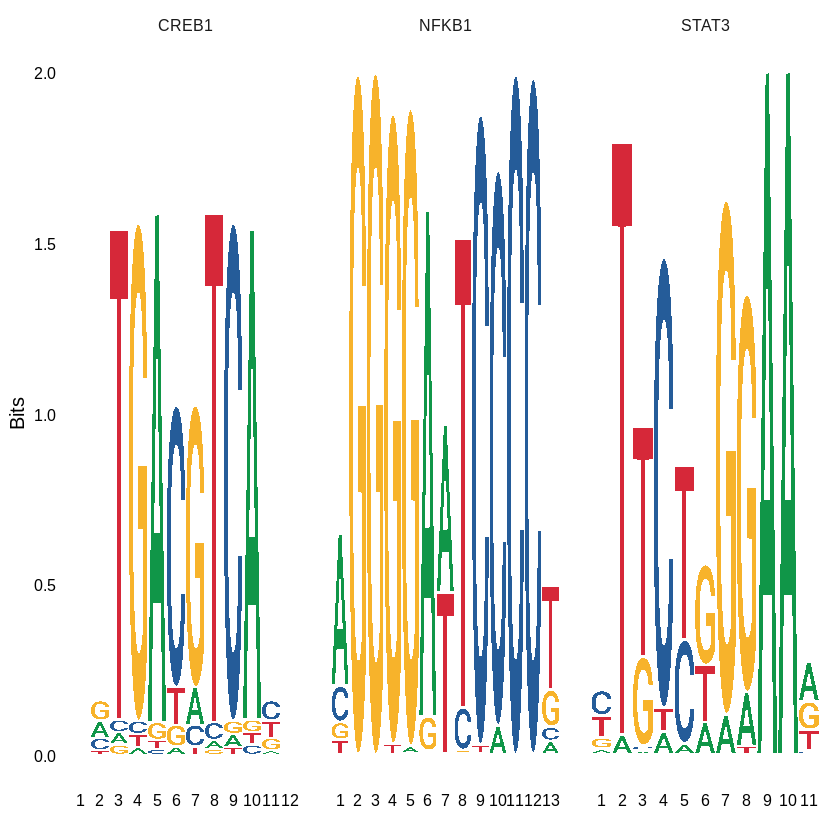

In [15]:
MotifPlot(
  object = LT,
  motifs = c('MA0018.3',  
             'MA0105.4',
             'MA0144.2'
              ),
  assay = 'peaks'
)

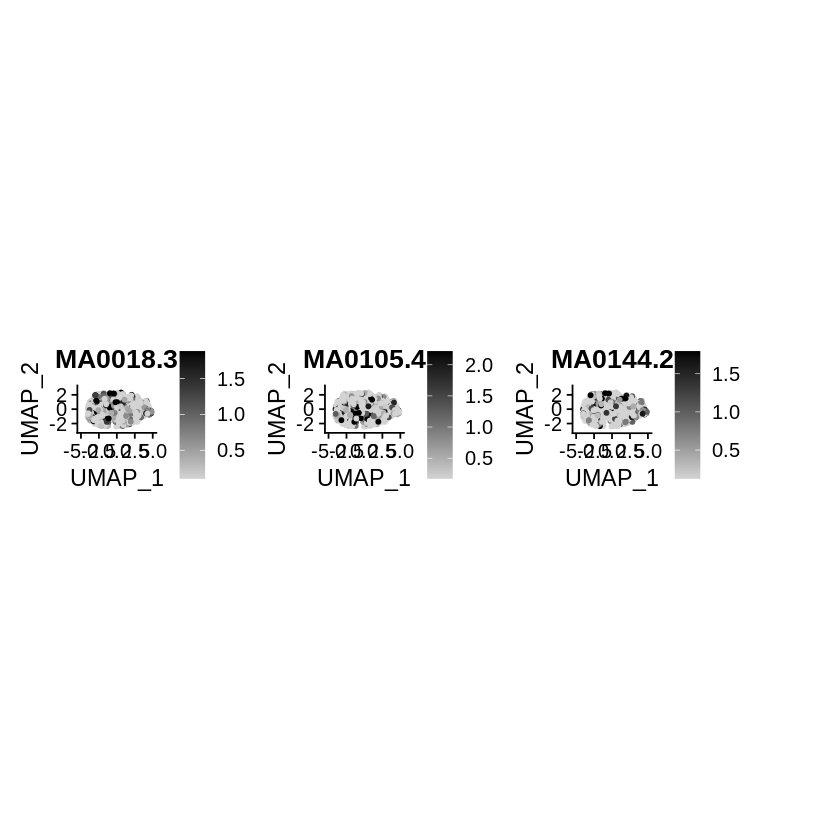

In [16]:
plot = FeaturePlot(
  object = LT,
  features = c('MA0018.3',  
               'MA0105.4',
               'MA0144.2'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 1,
  ncol = 4,
)

plot + coord_fixed(ratio = 1)
#plot 

In [17]:
#save plot
ggsave('scATAC_HSC_CREBNFKB1STAT3_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

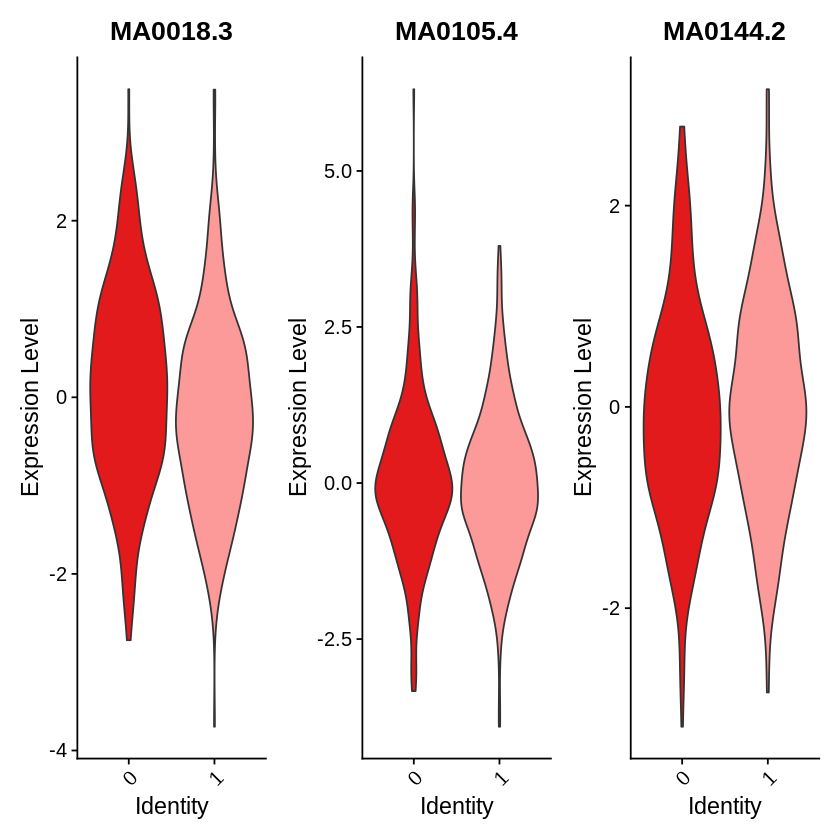

In [18]:
plot = VlnPlot(object = LT,
  features = c(
                'MA0018.3',  
                'MA0105.4',
                'MA0144.2'
                ),
  
  pt.size = FALSE,
  cols = c('#e31a1c', '#fb9a99'))
  #ncol = 2,)

plot

In [19]:
#save plot
ggsave('scATAC_HSC_CREBNFKB1STAT3_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

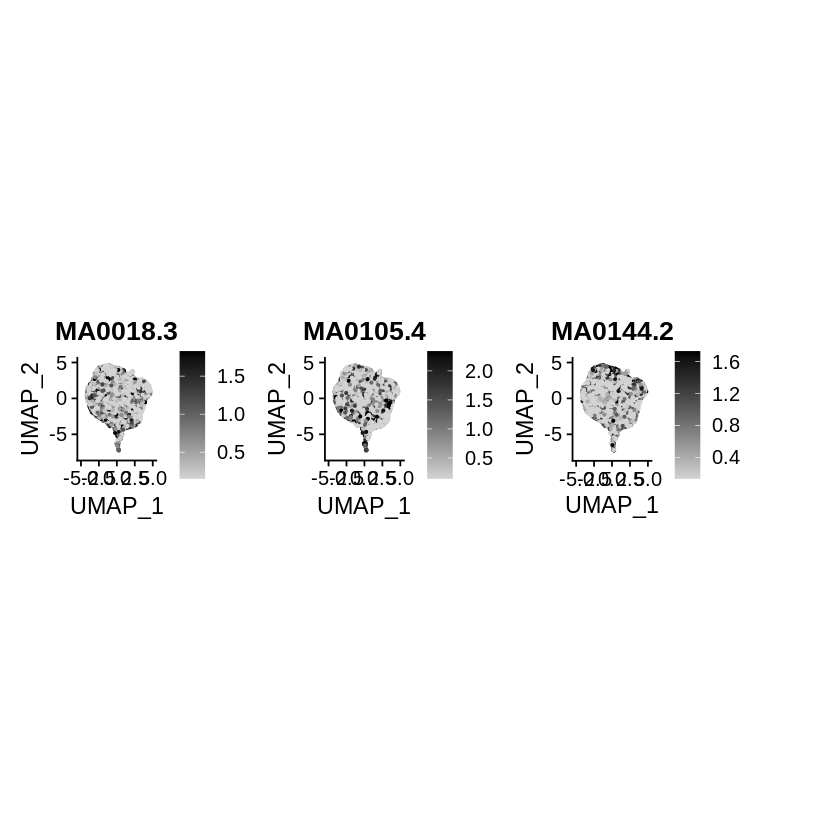

In [20]:
plot = FeaturePlot(
  object = combo,
  features = c('MA0018.3',  
               'MA0105.4',
               'MA0144.2'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5,
  ncol = 4,
)

plot + coord_fixed(ratio = 1)
#plot 

In [21]:
#save plot
ggsave('scATAC_LSK_CREBNFKB1STAT3_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

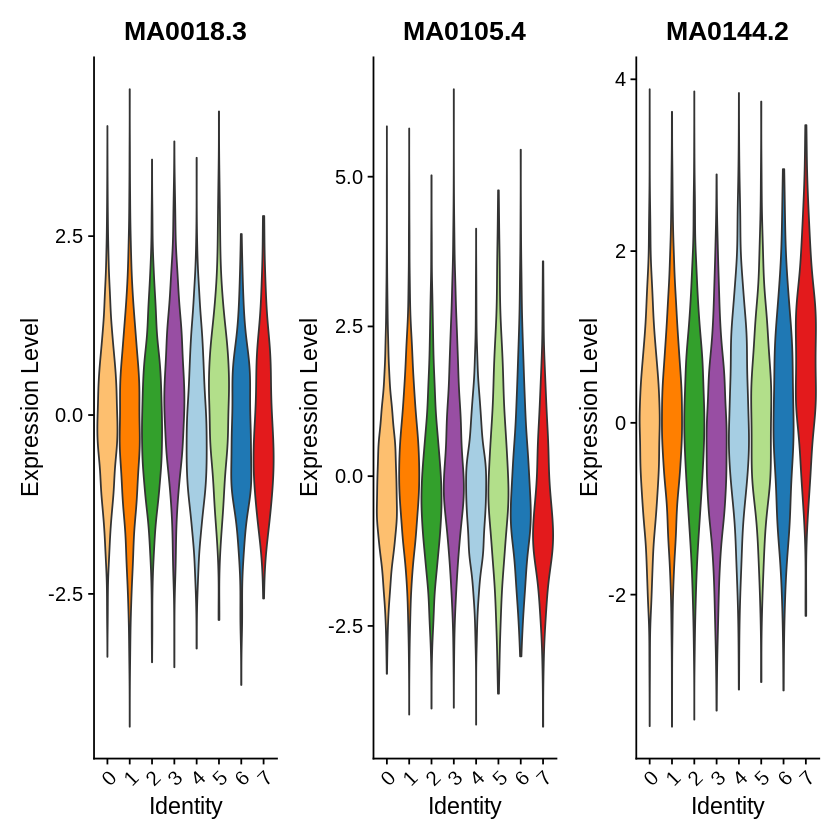

In [22]:
plot = VlnPlot(object = combo,
  features = c(
                'MA0018.3',  
                'MA0105.4',
                'MA0144.2'     
                
                ),
  
  pt.size = FALSE,
  cols = c( '#fdbf6f', '#ff7f00','#33a02c', '#984ea3',  '#a6cee3', '#b2df8a', '#1f78b4', '#e31a1c'))
  #ncol = 2,)

plot

In [23]:
#save plot
ggsave('scATAC_LSK_CREBNFKB1STAT3_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

### diff markers + IrF

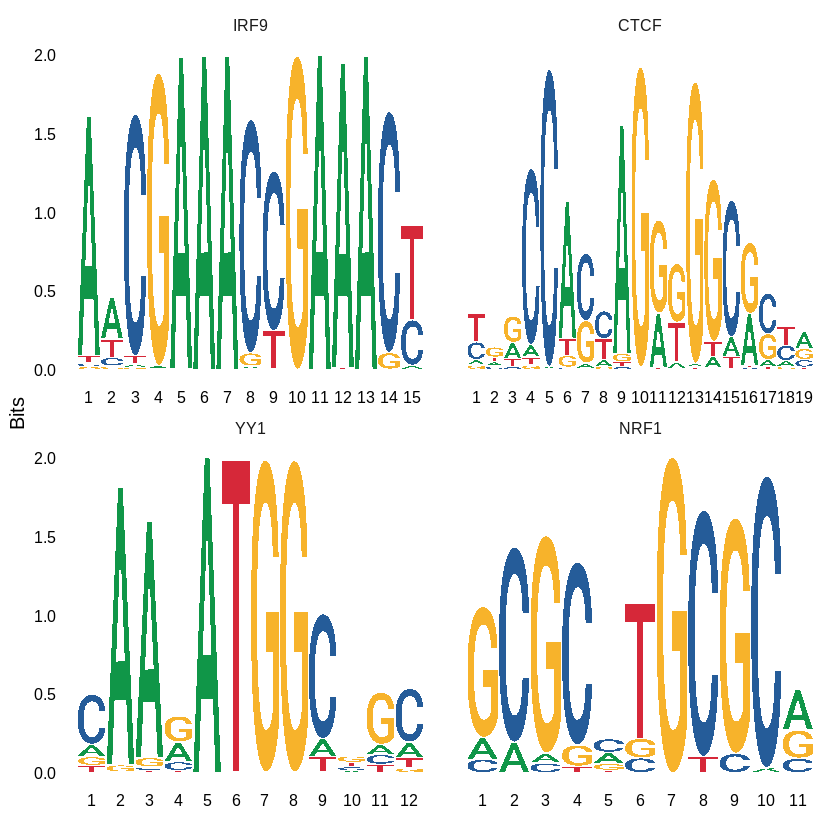

In [24]:
MotifPlot(
  object = LT,
  motifs = c('MA0653.1',
             'MA0139.1',
             'MA0095.2', 
             "MA0506.1"
              ),
  assay = 'peaks'
)

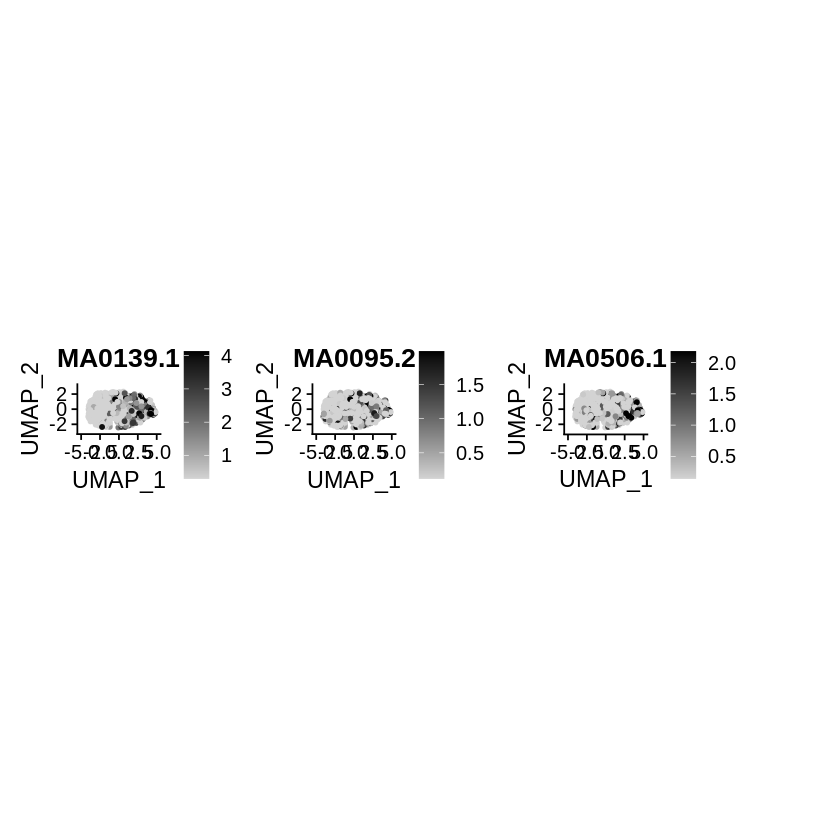

In [25]:
plot = FeaturePlot(
  object = LT,
  features = c(
               'MA0139.1',
               'MA0095.2', 
               "MA0506.1"
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 1,
  ncol = 4,
)

plot + coord_fixed(ratio = 1)
#plot 

In [26]:
#save plot
ggsave('scATAC_HSC_diffmarkers_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

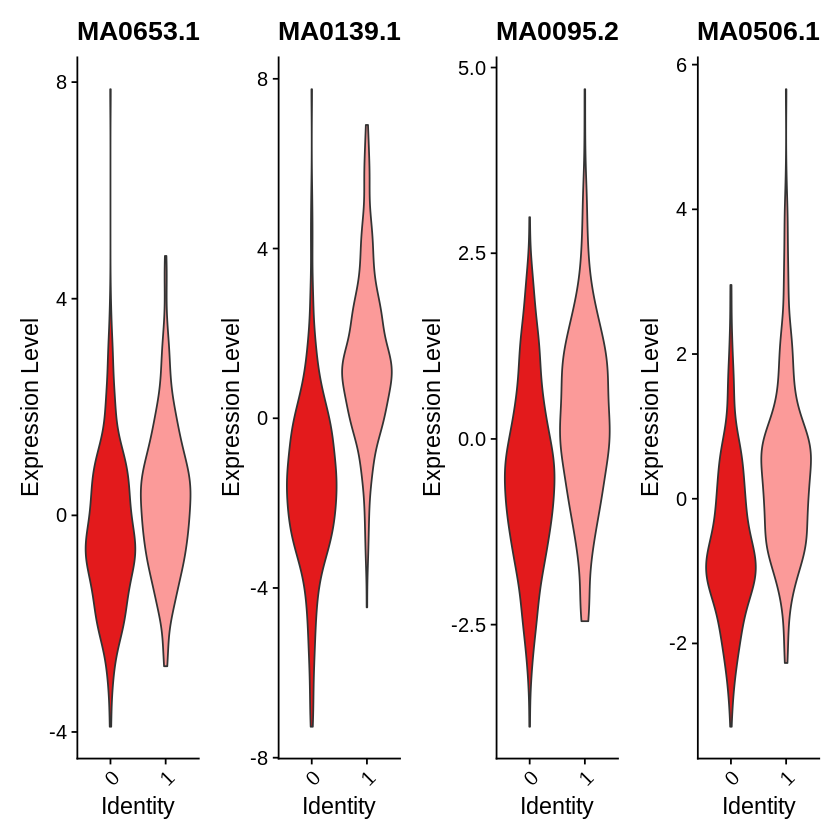

In [27]:
plot = VlnPlot(object = LT,
  features = c('MA0653.1',
               'MA0139.1',
               'MA0095.2', 
                "MA0506.1"
                ),
  
  pt.size = FALSE,
  cols = c('#e31a1c', '#fb9a99'),
      ncol = 4        )
 

plot

In [28]:
#save plot
ggsave('scATAC_HSC_diffmarkers_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

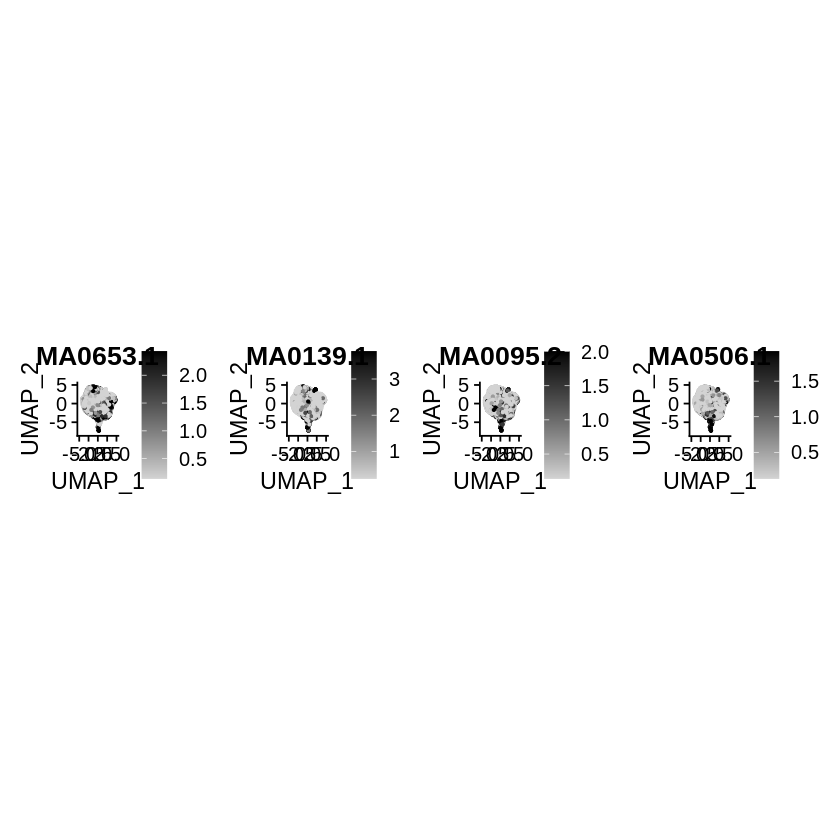

In [29]:
plot = FeaturePlot(
  object = combo,
  features = c('MA0653.1',
               'MA0139.1',
               'MA0095.2', 
               "MA0506.1"
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5,
  ncol = 4,
)

plot + coord_fixed(ratio = 1)
#plot 

In [30]:
#save plot
ggsave('scATAC_LSK_diffmarkers_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

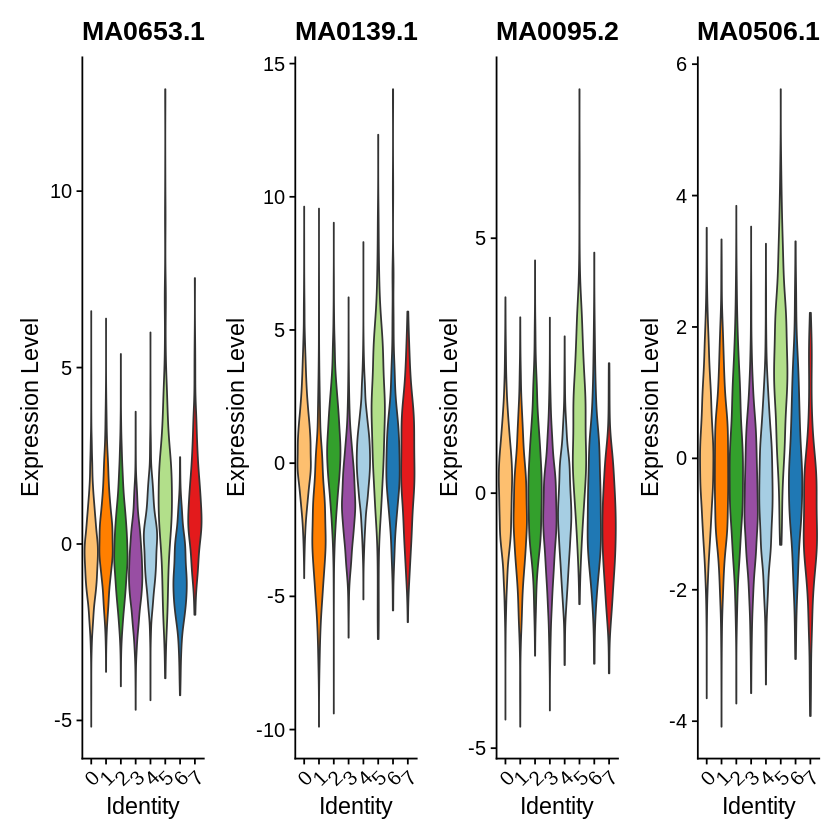

In [31]:
# pick IRF + 3 

plot = VlnPlot(object = combo,
  features = c(
                'MA0653.1',
               'MA0139.1',
               'MA0095.2', 
                "MA0506.1"

                ),
  
  pt.size = FALSE,
  cols = c( '#fdbf6f', '#ff7f00','#33a02c', '#984ea3',  '#a6cee3', '#b2df8a', '#1f78b4', '#e31a1c'),
  ncol = 4)

plot

In [32]:
ggsave('scATAC_LSK_diffmarkers_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

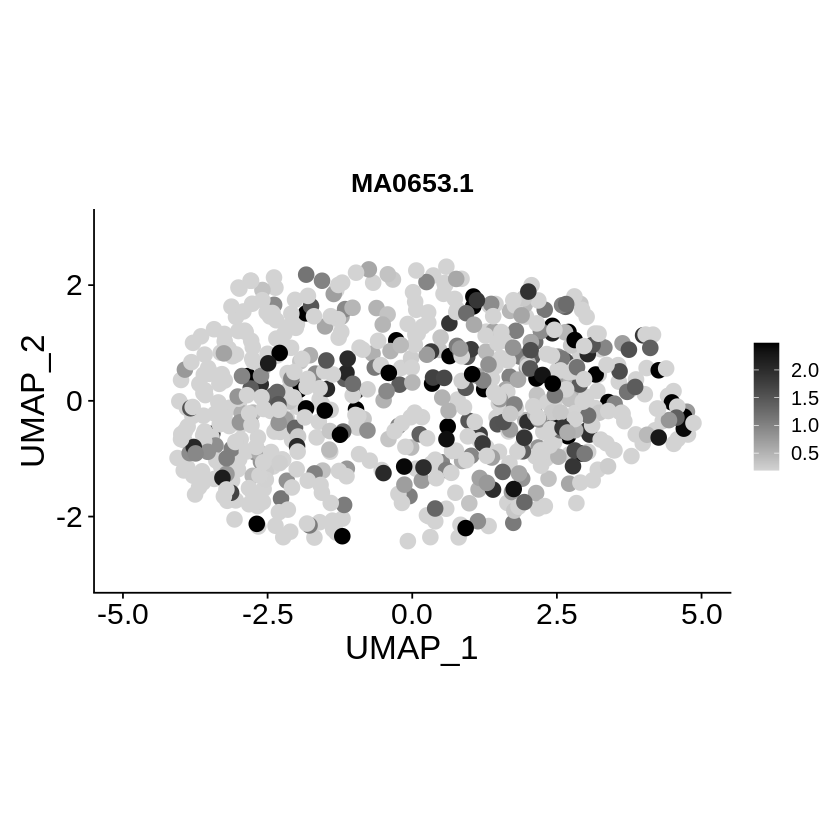

In [33]:
#'MA0653.1'	IRF9

baseplot = FeaturePlot(object = LT,
                       features = 'MA0653.1',         
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 4,
                       label.size = 10,
                        #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) 
#+NoLegend()

In [34]:
#save plot
ggsave('scATAC_HSC_diffmarkers_IRF9.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


### prog markers + Ap-1

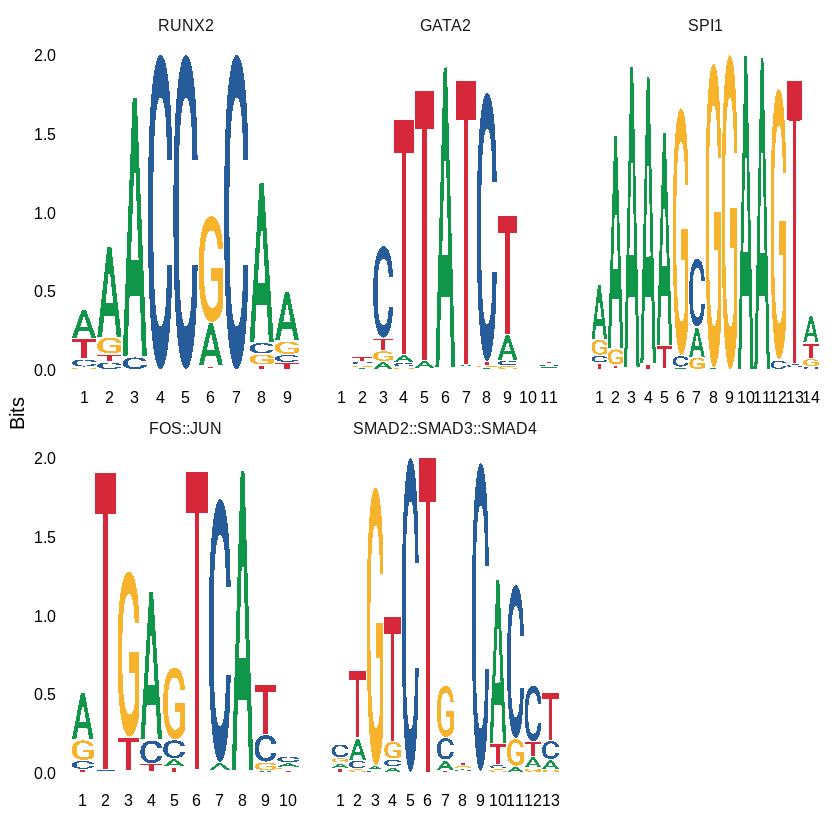

In [35]:
MotifPlot(
  object = LT,
  motifs = c('MA0511.2',
             'MA0036.3',
             'MA0080.4',         
             'MA0099.3',
             'MA0513.1'
              ),
  assay = 'peaks'
)

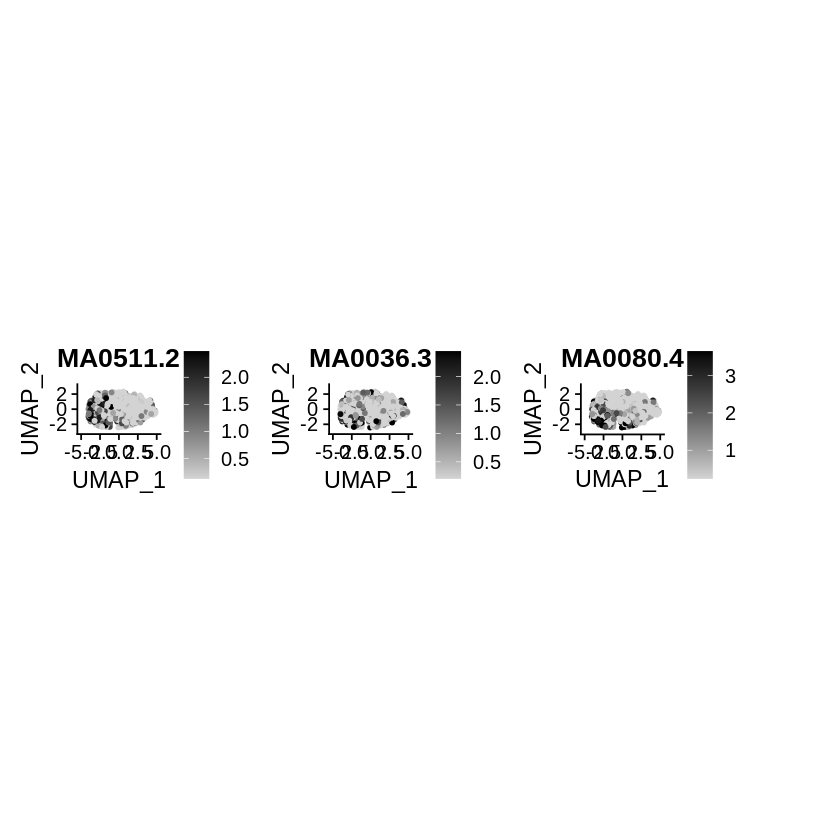

In [36]:
plot = FeaturePlot(
  object = LT,
  features = c(
               'MA0511.2',
               'MA0036.3',
               'MA0080.4'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 1,
  ncol = 4,
)

plot + coord_fixed(ratio = 1)
#plot 

In [37]:
#save plot
ggsave('scATAC_HSC_progmarkers_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

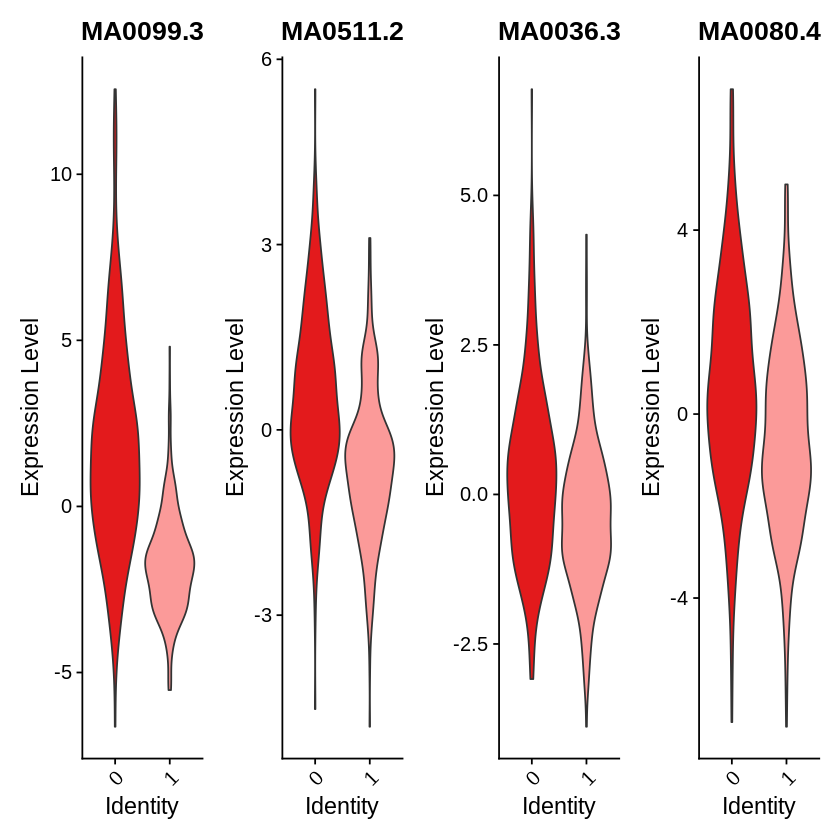

In [38]:
plot = VlnPlot(object = LT,
  features = c('MA0099.3',
               'MA0511.2',
               'MA0036.3',
               'MA0080.4'
                 ),
  
  pt.size = FALSE,
  cols = c('#e31a1c', '#fb9a99'),
      ncol = 4        )
 

plot

In [39]:
#save plot
ggsave('scATAC_HSC_progmarkers_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

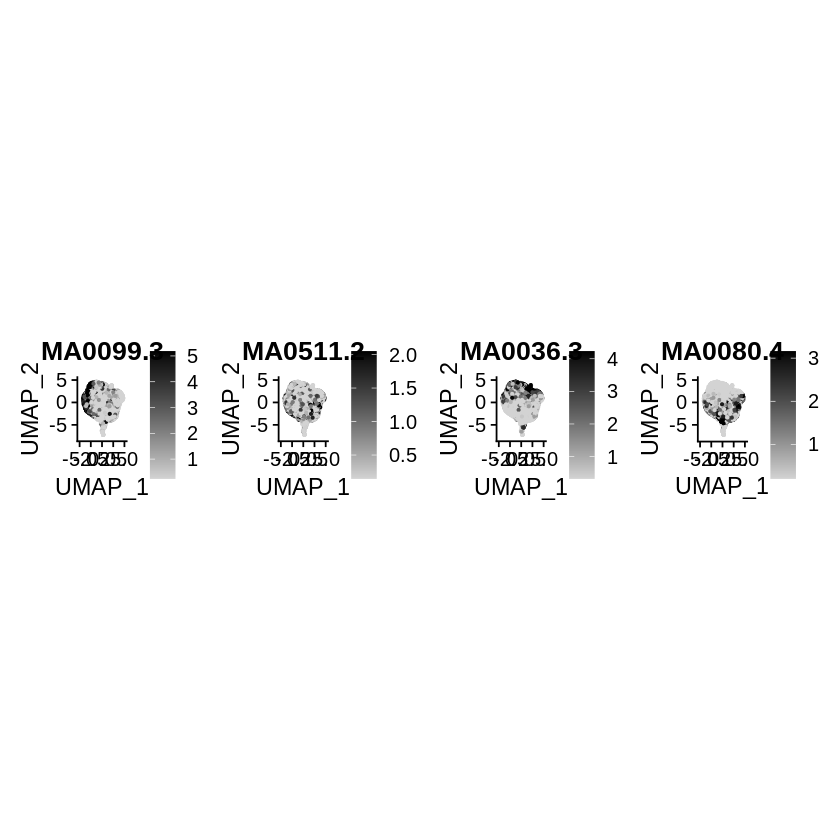

In [40]:
plot = FeaturePlot(
  object = combo,
  features = c('MA0099.3',
               'MA0511.2',
               'MA0036.3',
               'MA0080.4'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.5,
  ncol = 4,
)

plot + coord_fixed(ratio = 1)
#plot 

In [41]:
#save plot
ggsave('scATAC_LSK_progmarkers_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

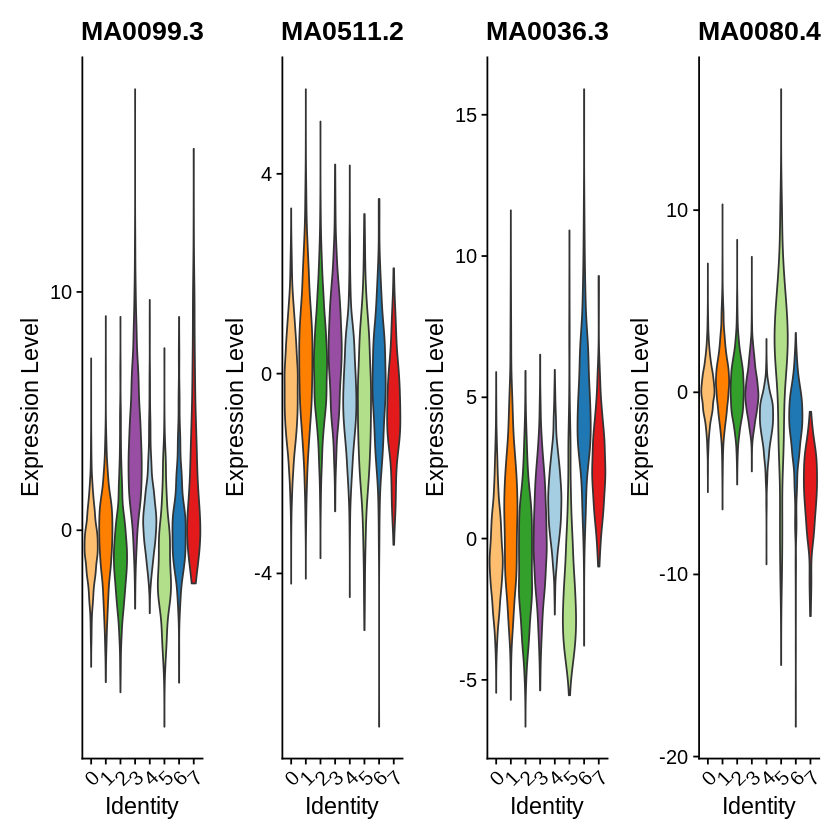

In [42]:
# pick IRF + 3 

plot = VlnPlot(object = combo,
  features = c('MA0099.3',
               'MA0511.2',
               'MA0036.3',
               'MA0080.4'

                ),
  
  pt.size = FALSE,
  cols = c( '#fdbf6f', '#ff7f00','#33a02c', '#984ea3',  '#a6cee3', '#b2df8a', '#1f78b4', '#e31a1c'),
  ncol = 4)

plot

In [43]:
ggsave('scATAC_LSK_progmarkers_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

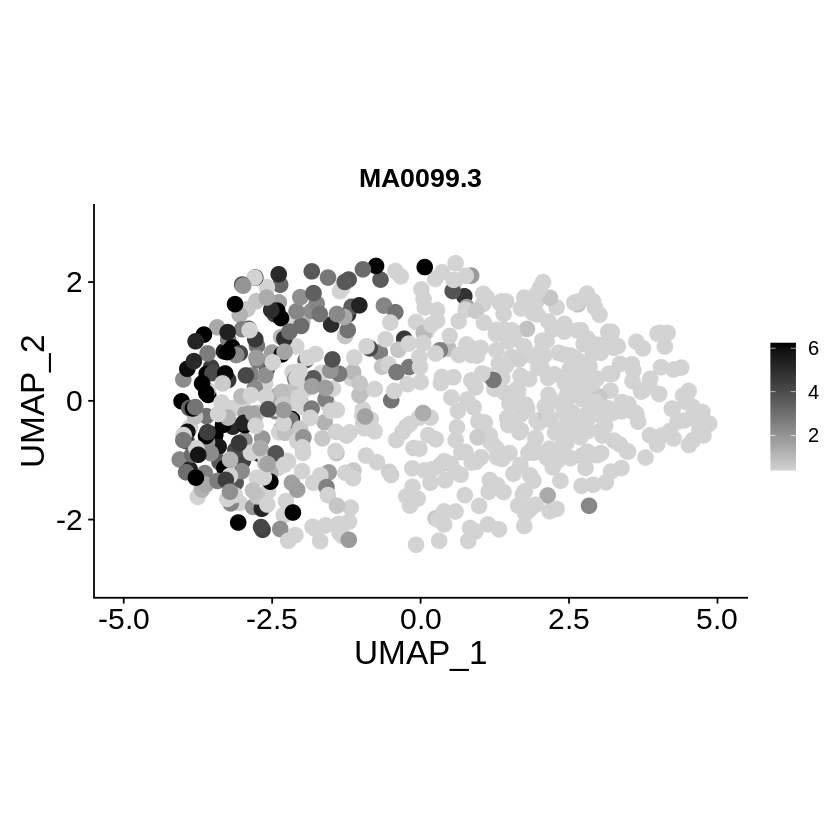

In [44]:
#'MA0099.3'	FOS:JUN

baseplot = FeaturePlot(object = LT,
                       features = 'MA0099.3',         
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 4,
                       label.size = 10,
                        #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) 
#+NoLegend()

In [45]:
#save plot
ggsave('scATAC_HSC_progmarkers_AP1.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


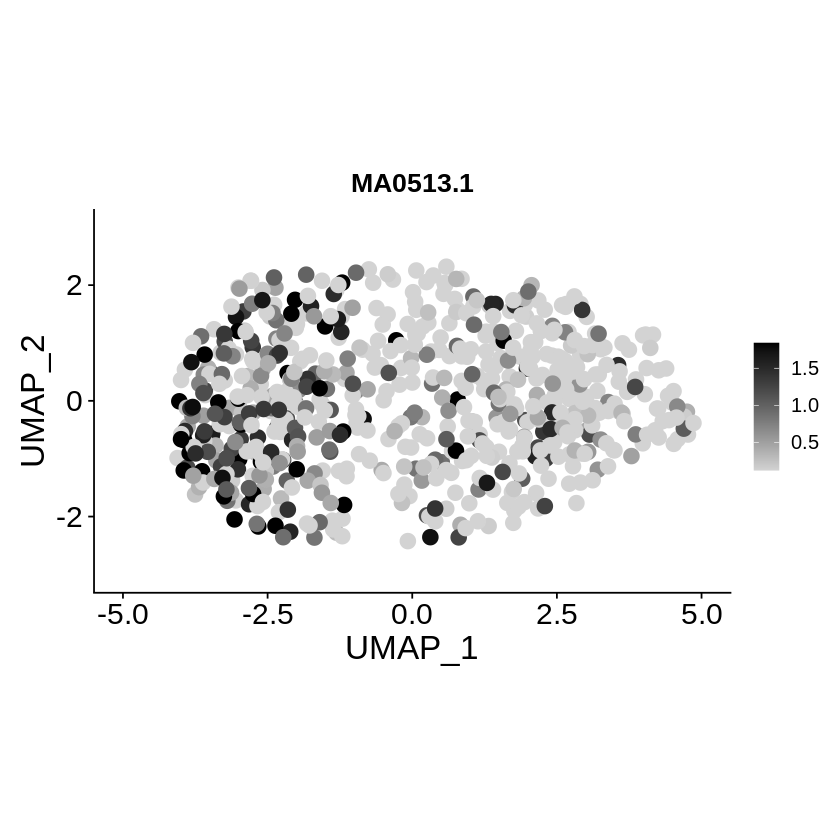

In [46]:
#'MA0513.1'	SMAD

baseplot = FeaturePlot(object = LT,
                       features = 'MA0513.1',         
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 4,
                       label.size = 10,
                        #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) 
#+NoLegend()

In [47]:
#save plot
ggsave('scATAC_HSC_progmarkers_Smad.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

Saving 6.67 x 6.67 in image


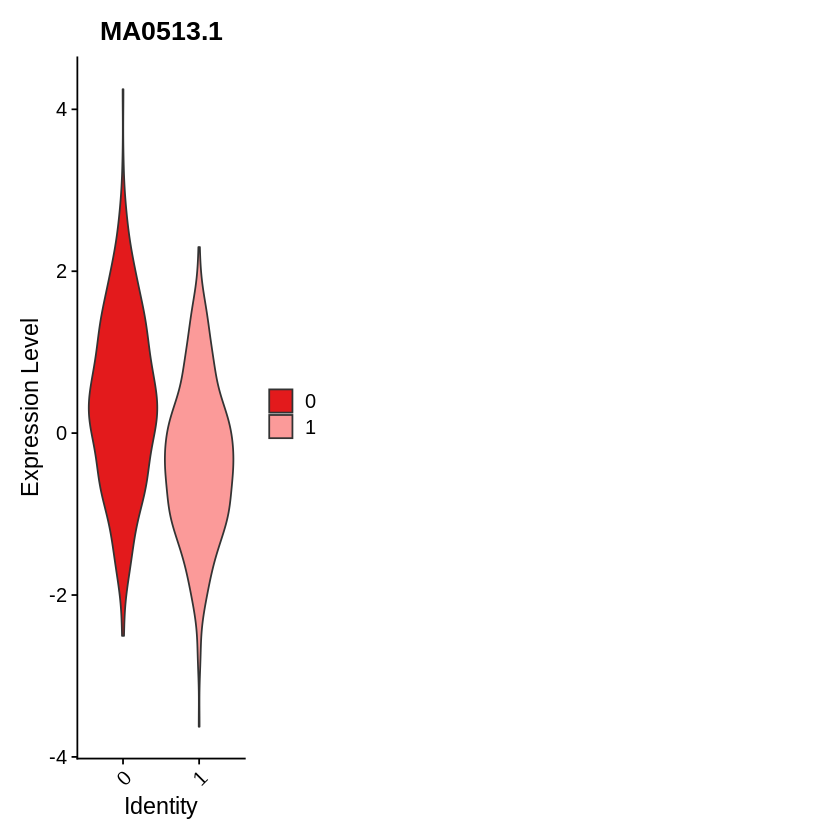

In [48]:
plot = VlnPlot(object = LT,
  features = c('MA0513.1'
                 ),
  
  pt.size = FALSE,
  cols = c('#e31a1c', '#fb9a99'),
      ncol = 4        )
 

plot

In [49]:
#save plot
ggsave('scATAC_HSC_SMAD_violin.svg', plot = last_plot(), device = 'svg', width = 8, height = 3,
       path = './figures/', scale = 1, units = 'in', dpi = 300)

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c('MA0018.3',  
                'MA0105.4',
                'MA0144.2'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c('MA0018.3',  
'MA0476.1',
'MA0099.3',
'MA0105.4',
'MA0778.1',
'MA0144.2'

                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c(
'MA1418.1',
'MA1419.1',
'MA1420.1',
'MA0772.1',
'MA0652.1',
'MA0653.1',
'MA0050.2',
'MA0051.1'


                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c(
'MA1418.1',
'MA0772.1',
'MA0653.1'


                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
#save plot
ggsave('scATAC_HSC_diff_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_HSC_diff_motifs.pdf', plot = last_plot(), device = 'pdf', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_HSC_diff_motifs.jpg', plot = last_plot(), device = 'jpg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c(
'MA1418.1',
'MA1419.1',
'MA1420.1',
'MA0772.1'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c(
'MA0652.1',
'MA0653.1',
'MA0050.2',
'MA0051.1'

                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
'MA0652.1',
'MA0653.1',
'MA0050.2',
'MA0051.1'


In [ ]:
MotifPlot(
  object = LT,
  motifs = c('MA1418.1',
'MA1419.1',
'MA1420.1',
'MA0772.1',
'MA0652.1',
'MA0653.1',
'MA0050.2',
'MA0051.1'
              ),
  assay = 'peaks'
)

In [ ]:
plot = FeaturePlot(
  object = LT,
  features = c('MA0511.2',
               'MA0036.3',
               'MA0080.4',         
               'MA0099.3',
               'MA0513.1'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.6,
  ncol = 5,
)

plot + coord_fixed(ratio = 1)
#plot 

In [ ]:
#save plot
ggsave('scATAC_HSC_prog_motifs.svg', plot = last_plot(), device = 'svg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_HSC_prog_motifs.pdf', plot = last_plot(), device = 'pdf', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_HSC_prog_motifs.jpg', plot = last_plot(), device = 'jpg', width = 16, height = 8, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
baseplot = FeaturePlot(object = LT,
                   features = 'MA0162.3',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 4,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:


baseplot = FeaturePlot(object = LT,
                   features = 'MA0469.2',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 4,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

#### plotting LSK cells

In [ ]:
MA0018.3	CREB1	0.328639974
MA0476.1	FOS	6.84E-67
MA0099.3	FOS::JUN	2.98E-63
MA0105.4	NFKB1	1
MA0778.1	NFKB2	1
MA0144.2	STAT3	1

MA0050.2	IRF1	0.000992006
MA0051.1	IRF2	0.002935402
MA1418.1	IRF3	0.068651746
MA1419.1	IRF4	3.33E-07
MA1420.1	IRF5	0.7358479
MA0772.1	IRF7	7.51E-08
MA0652.1	IRF8	9.84E-06
MA0653.1	IRF9	2.37E-05 - downstream of ifn receptor

In [ ]:
plot = FeaturePlot(
  object = combo,
  features = c('MA0018.3',  
'MA0476.1',
'MA0099.3',
'MA0105.4',
'MA0778.1',
'MA0144.2'

                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = FeaturePlot(
  object = combo,
  features = c(
'MA1418.1',
'MA1419.1',
'MA1420.1',
'MA0772.1',
'MA0652.1',
'MA0653.1',
'MA0050.2',
'MA0051.1'


                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = FeaturePlot(
  object = combo,
  features = c(
'MA1418.1',
'MA0772.1',
'MA0653.1'


                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
plot = VlnPlot(object = combo,
  features = c(
                'MA0018.3',  
'MA0476.1',
'MA0099.3',
'MA0105.4',
'MA0778.1',
'MA0144.2'

                ),
  )
  #pt.size = 0.6,
  #ncol = 2,)

plot

In [ ]:
VlnPlot(
  object = eccite, 
  features = "adt_PDL1", 
  idents = c("NT","JAK2","STAT1","IFNGR1","IFNGR2", "IRF1"), 
  group.by = "gene", 
  pt.size = 0.2, 
  sort = T, 
  split.by = "mixscape_class.global", 
  cols = c('#1f78b4', '#ff7f00')) +
  ggtitle("PD-L1 protein") +
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA0018.3',  
                'MA0476.1',
                'MA0099.3',
                'MA0105.4',
                'MA0778.1',
                'MA0144.2'

                ),
  
  pt.size = 0.6,
  cols = c('#1f78b4', '#ff7f00'))
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA0511.2',
                'MA0036.3',
                'MA0080.4',         
                'MA0099.3',
                'MA0513.1'

                ),
  
  pt.size = 0.2,
  cols = c('#1f78b4', '#ff7f00'))
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA0511.2',
                'MA0036.3',
                'MA0080.4'        
                

                ),
  
  pt.size = 0.2,
  cols = c('#1f78b4', '#ff7f00'))
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = combo,
  features = c(
                'MA0511.2',
                'MA0036.3',
                'MA0080.4'        
                
                ),
  
  pt.size = 0.05,
  cols = c( '#1f78b4', '#ff7f00','#b2df8a', '#fb9a99',  '#a6cee3', '#33a02c', '#fdbf6f', '#e31a1c'))
  #ncol = 2,)

plot

In [ ]:
MotifPlot(
  object = LT,
  motifs = c('MA0511.2',
             'MA0036.3',
             'MA0080.4',         
             'MA0099.3',
             'MA0513.1'
              ),
  assay = 'peaks',
    ncol = 5
)

In [ ]:
plot = VlnPlot(object = combo,
  features = c(
                'MA0511.2',
                'MA0036.3',
                'MA0080.4',         
                'MA0099.3',
                'MA0513.1'

                ),
  
  pt.size = 0.05,
  cols = c( '#1f78b4', '#ff7f00','#b2df8a', '#fb9a99',  '#a6cee3', '#33a02c', '#fdbf6f', '#e31a1c'))
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA0139.1',
               'MA0095.2', 
               'MA0663.1',
               "MA0506.1",
               'MA0741.1'

                ),
  
  pt.size = 0.2,
  cols = c('#1f78b4', '#ff7f00'))
  #ncol = 2,)

plot

In [ ]:
# pick CTCF, Nrf1, YY1

MotifPlot(
  object = LT,
  motifs = c('MA0139.1',
               'MA0095.2', 
               'MA0663.1',
               "MA0506.1",
               'MA0741.1'
              ),
  assay = 'peaks',
    ncol = 5
)

In [ ]:
# pick IRF + 3 

plot = VlnPlot(object = combo,
  features = c(
                'MA0139.1',
               'MA0095.2', 
               'MA0663.1',
               "MA0506.1",
               'MA0741.1'

                ),
  
  pt.size = 0.05,
  cols = c( '#1f78b4', '#ff7f00','#b2df8a', '#fb9a99',  '#a6cee3', '#33a02c', '#fdbf6f', '#e31a1c'))
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA0511.2',
                'MA0036.3',
                'MA0080.4',         
                'MA0099.3',
                'MA0513.1'

                ),
  
  pt.size = 0.2,
  cols = c('#1f78b4', '#ff7f00'))
  #ncol = 2,)

plot

In [ ]:
MotifPlot(
  object = combo,
  motifs = c('MA0511.2',
             'MA0036.3',
             'MA0080.4',         
             'MA0099.3',
             'MA0513.1'
              ),
  assay = 'peaks',
    ncol = 5
)

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA1418.1',
                'MA0772.1',
                'MA0653.1'


                ),
  )
  #pt.size = 0.6,
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = LT,
  features = c(
                'MA1418.1',
                'MA1419.1',
                'MA1420.1',
                'MA0772.1',
                'MA0652.1',
                'MA0653.1',
                'MA0050.2',
                'MA0051.1'

                ),
  )
  #pt.size = 0.6,
  #ncol = 2,)

plot

In [ ]:
plot = VlnPlot(object = combo,
  features = c(
                'MA1418.1',
                'MA0772.1',
                'MA0653.1'


                ),
  )
  #pt.size = 0.6,
  #ncol = 2,)

plot

In [ ]:
plot = FeaturePlot(
  object = combo,
  features = c(
'MA1418.1',
'MA0772.1',
'MA0653.1'


                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  #pt.size = 0.6,
  #ncol = 2,
)

#plot + coord_fixed(ratio = 1)
plot 

In [ ]:
baseplot = FeaturePlot(object = combo,
                   features = 'MA0139.1',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 0.8,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()               

In [ ]:


baseplot = FeaturePlot(object = combo,
                   features = 'MA0162.3',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 0.8,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()     

In [ ]:
baseplot = FeaturePlot(object = combo,
                   features = 'MA0663.1',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 0.8,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()     

In [ ]:
#e2f - not that great
baseplot = FeaturePlot(object = combo,
                   features = 'MA0469.2',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 0.8,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
plot = FeaturePlot(
  object = combo,
  features = c('MA0139.1',
               'MA0095.2', 
               'MA0663.1',
               "MA0506.1",
               'MA0741.1'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.04,
  ncol = 5,
)

plot + coord_fixed(ratio = 0.7)
#plot 

In [ ]:
#save plot
ggsave('scATAC_LSK_diff_motifs.svg', plot = last_plot(), device = 'svg', width = 15, height = 6, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_LSK_diff_motifs.pdf', plot = last_plot(), device = 'pdf', width = 15, height = 6, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_LSK_diff_motifs.jpg', plot = last_plot(), device = 'jpg', width = 15, height = 6, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
plot = FeaturePlot(
  object = combo,
  features = c('MA0511.2',
               'MA0036.3',
               'MA0080.4',         
               'MA0099.3',
               'MA0513.1'
                ),
  cols = c('lightgrey', 'black'),
  min.cutoff = 'q10',
  max.cutoff = 'q90',
  pt.size = 0.04,
  ncol = 5,
)

plot + coord_fixed(ratio = 0.7)

In [ ]:
#save plot
ggsave('scATAC_LSK_prog_motifs.svg', plot = last_plot(), device = 'svg', width = 15, height = 6, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_LSK_prog_motifs.pdf', plot = last_plot(), device = 'pdf', width = 15, height = 6, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#save plot
ggsave('scATAC_LSK_prog_motifs.jpg', plot = last_plot(), device = 'jpg', width = 15, height = 6, path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
# diff motifs

MotifPlot(
  object = combo,
  motifs = c('MA0139.1',
             'MA0095.2', 
             'MA0663.1',
             "MA0506.1",
             'MA0741.1'),
  assay = 'peaks',
    ncol = 5
)

In [ ]:
ggsave('scATAC_Motifnames_up_in_diff.svg', plot = last_plot(), width = 15, height = 2, device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
ggsave('scATAC_Motifnames_up_in_diff.pdf', plot = last_plot(), width = 15, height = 2, device = 'pdf', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
ggsave('scATAC_Motifnames_up_in_diff.jpg', plot = last_plot(), width = 15, height = 2, device = 'jpg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
MotifPlot(
  object = combo,
  motifs = c('MA0511.2',
             'MA0036.3',
             'MA0080.4',         
             'MA0099.3',
             'MA0513.1'
              ),
  assay = 'peaks',
    ncol = 5
)

In [ ]:
ggsave('scATAC_Motifnames_up_in_prog.svg', plot = last_plot(), width = 15, height = 2, device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
ggsave('scATAC_Motifnames_up_in_prog.pdf', plot = last_plot(), width = 15, height = 2, device = 'pdf', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
ggsave('scATAC_Motifnames_up_in_prog.jpg', plot = last_plot(), width = 15, height = 2, device = 'jpg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

#### selected motifs

In [ ]:
# CREB1 - MA0018.3

baseplot = FeaturePlot(object = LT,
                      features = 'MA0018.3',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 4,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
baseplot = FeaturePlot(object = combo,
                   features = 'MA0018.3',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 0.8,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
# STAT3 - MA0144.2

baseplot = FeaturePlot(object = LT,
                      features = 'MA0144.2',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 4,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
# ISGF3 - MA1418.1

baseplot = FeaturePlot(object = LT,
                      features = 'MA1418.1',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 4,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
baseplot = FeaturePlot(object = combo,
                   features = 'MA1418.1',
                      cols = c('lightgrey', 'black'),
                      min.cutoff = 'q10',
                      max.cutoff = 'q90',
                      pt.size = 0.8,
                      label.size = 10,
                       #vector.friendly = TRU
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
MA1418.1

In [ ]:
PB0037.1

In [ ]:
sessionInfo()

In [ ]:
extra

In [ ]:
#CREB

baseplot = FeaturePlot(object = LT,
                       features = 'MA0018.3',         
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 4,
                       label.size = 10,
                        #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) 
#+NoLegend()

In [ ]:
#save plot
ggsave('scATAC_HSC_CREB.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
baseplot = FeaturePlot(object = combo,
                       features = 'MA0018.3',
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 0.9,
                       label.size = 10,
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 0.7) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
#save plot
ggsave('scATAC_LSK_CREB.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#MA0105.4	NFKB1

baseplot = FeaturePlot(object = LT,
                       features = 'MA0105.4',         
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 4,
                       label.size = 10,
                        #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) 
#+NoLegend()

In [ ]:
#save plot
ggsave('scATAC_HSC_NFKB.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
baseplot = FeaturePlot(object = combo,
                       features = 'MA0105.4',
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 0.9,
                       label.size = 10,
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 0.7) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
#save plot
ggsave('scATAC_LSK_NFKB.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
#MA0144.2	STAT3

baseplot = FeaturePlot(object = LT,
                       features = 'MA0144.2',         
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 4,
                       label.size = 10,
                        #vector.friendly = TRUE
                    
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 1) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18)) 
#+NoLegend()

In [ ]:
#save plot
ggsave('scATAC_HSC_STAT3.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)

In [ ]:
baseplot = FeaturePlot(object = combo,
                       features = 'MA0144.2',
                       cols = c('lightgrey', 'black'),
                       min.cutoff = 'q10',
                       max.cutoff = 'q90',
                       pt.size = 0.9,
                       label.size = 10,
                        )

baseplot + 
FontSize(x.title = 20, y.title = 20) + coord_fixed(ratio = 0.7) +
theme(axis.text.x = element_text(size=18), axis.text.y = element_text(size=18))
#NoLegend()

In [ ]:
#save plot
ggsave('scATAC_LSK_STAT3.svg', plot = last_plot(), device = 'svg', path = './figures/',
       scale = 1, units = 'in', dpi = 300)